# Artificial Intelligence CA2
## *Reinforcement Learning*
## Arian Firoozi 810100196

In this assignment, reinforcement learning is used to solve two problems from **gym** environment.

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
        - [Results](#1-4-3)
- [Part 2: Q-Learning Algorithm](#2)
    - [Question 7:](#2-1)
    - [َQuestion 8:](#2-2)
    - [َQuestion 9:](#2-3)
    - [َQuestion 10:](#2-4)

In [1]:
# import
import numpy as np
import gym
import time
import matplotlib.pyplot as plt
import seaborn
import random

SEED = 196

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

<a name='1-0'></a>
### Question 1:

Value iteration is a method of computing optimal value function of the environment. In each step of the algorithm it updates the value function by the formula:

 V(s) = max $ \sum $  [p(s'|s,a) * (R(s,a,s') + γ * V(s'))]

Value function improves with each step, therefore resulting in it converging after finite steps of running the algorithm.


<a name='1-1'></a>
### Question 2:

In [2]:
class ValueIteration():
    def __init__(self, env:gym.Env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))

    def value_estimation(self):
        self.delta = np.inf

        n = 0
        while(self.delta > self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                         action_value += probability * (reward + self.state_values[next_state] * self.discount_factor)
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

                if (self.delta < self.theta):
                    break
            n+=1
        return n

    def take_action(self, action):
        next_state, reward, done, _,_ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state
   

<a name='1-12'></a>
### Question 3:

Policy iteration is an alternative to value iteration which consists of two main steps: policy evaluation (that evaluates V function for the policy), and policy improvement (that updates the policy via one step lookahead approach). This algorithm runs until the policy converges, which generally does so with fewer iterations compared to value iteration algorithm.

<a name='1-2'></a>
### Question 4:

In [3]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    new_state_value += probability * (reward + self.state_values[next_state] * self.discount_factor)
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + self.state_values[next_state] * self.discount_factor)
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        n = 0
        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()
            n+=1
        
        return n

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Showing Results:

In [4]:
def show_human(value_iter):
    value_iter.env.reset()
    curr_state = 0
    done = False
    
    value_iter.env.render()
    time.sleep(1)
    while (not done):
        curr_state, reward, done = value_iter.take_action(value_iter.get_optimal_policy(curr_state))
        value_iter.env.render()
        time.sleep(1)


def show_heatmap(value_iter:ValueIteration, name="Unknown Iteration"):
    row_n = int(value_iter.env.observation_space.n**0.5) # modified so 8x8 map can be observed as well
    col_n = int(value_iter.env.observation_space.n**0.5)
    map = [value_iter.get_state_values()[j*row_n:(j+1)*row_n] for j in range(col_n)]
    seaborn.heatmap(map, annot=True, cmap='viridis')
    plt.title(name)
    plt.ylabel("States Y")
    plt.xlabel("States X")
    plt.grid()
    plt.show()

<a name='1-3-1'></a>
#### Value Iteration:

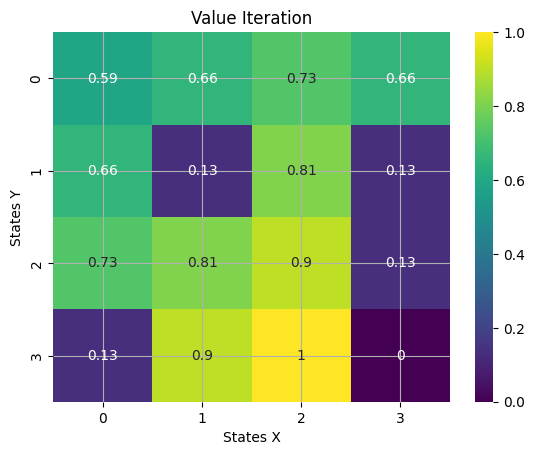

C:\Users\arian\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="human", is_slippery=False)

value_iter = ValueIteration(env, 0.9)
value_iter.value_estimation()
show_heatmap(value_iter, "Value Iteration")
show_human(value_iter)

env.close()

<a name='1-3-2'></a>
#### Policy Iteration:

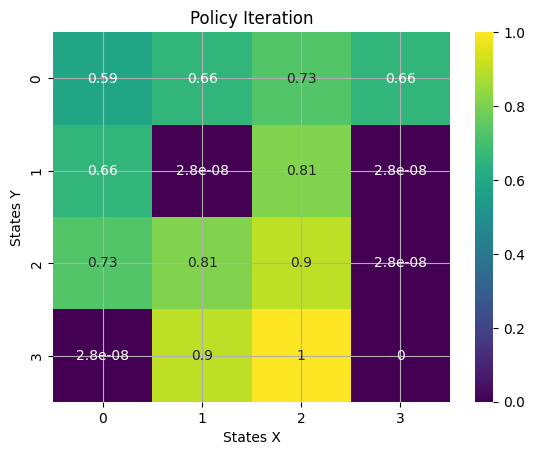

C:\Users\arian\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [6]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="human", is_slippery=False)

policy_iter = PolicyIteration(env, 0.9)
policy_iter.policy_estimation()
show_heatmap(policy_iter, "Policy Iteration")
show_human(policy_iter)

env.close()

<a name='1-4'></a>
### Question 6:

<a name='1-4-1'></a>
#### Value Iteration:

In [7]:
REPS = 40

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="human", is_slippery=False)

avg_episode_count = 0
for i in range(REPS):
    value_iter = ValueIteration(env, 0.9)
    avg_episode_count += value_iter.value_estimation()
avg_episode_count /= REPS
print(avg_episode_count)

env.close()


7.0


<a name='1-4-2'></a>
#### Policy Iteration:

In [8]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="human", is_slippery=False)

avg_episode_count = 0
for i in range(REPS):
    policy_iter = PolicyIteration(env, 0.9)
    avg_episode_count += policy_iter.policy_estimation()
avg_episode_count /= REPS
print(avg_episode_count)

env.close()

6.45


<a name='1-4-3'></a>
### Results:

Policy iteration has slightly better performance since the number of episodes is generally fewer than value iteration algorithm. Value iteration solves the problem in 7 iterations while policy iteration does the same with an average of 6.4 episodes, which is not significant since the frozen lake is a relatively easy problem to solve. As for time complexity, both algorithms take the same amount of time to find the answer, but again, this is due to problem being easy to solve; For example in an 8x8 map performance difference starts to get more visible.

<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [9]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 196

<a name='2-1'></a>
### Qestion 7:

Q-learning is a reinforcement learning algorithm that is based on optimizing the total reward using an off-policy algorithm. Q-values are calculated using below formula:

Q(s, a) = Q(s, a) + learning rate * [reward + discount * max Q(s', a') - Q(s,a)]

As discussed, this formula is off-policy, allowing the algorithm to explore the map and find the optimal policy.

<a name='2-2'></a>
### Question 8:

In [10]:
class QLearningAgent():
    def __init__(self, env:gym, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

      self.seed = seed

    def run_episode(self, episode, decreasing = False):
      state, _ = self.reset()
      reward_all = 0
      done = False
      i = 0
      if decreasing:
        self.decrease_learning_rate(episode)
        self.decay_epsilon(episode)

      while not done:
        action = self.choose_action(state) 
        next_state, reward, done = self.take_action(action)
        reward_all += reward
        self.update_q_table(state, action, next_state, reward)
        state = next_state
        i+=1

      return reward_all

    def choose_action(self, state):
      ### START CODE HERE ###
      if random.random() < self.epsilon:
        action = random.randint(0, self.env.action_space.n - 1)
      else:
        action = np.argmax(self.q_table[state])
      ### END CODE HERE ###
      return action

    def update_q_table(self, state, action, nextState, reward):
      ### START CODE HERE ###
      self.q_table[state][action] += self.learning_rate * (reward + self.discount_factor * np.max(self.q_table[nextState]) - self.q_table[state][action])
      ### END CODE HERE ###

    def decay_epsilon(self, episode):
      ### START CODE HERE ###
      self.epsilon = np.max([self.epsilon - self.epsilon * episode / EPISODES, 0.001])
      ### END CODE HERE ###

    def decrease_learning_rate(self, episode):
      ### START CODE HERE ###
      self.learning_rate = np.max([self.learning_rate - self.learning_rate/10 * episode / EPISODES, 0.001])
      ### END CODE HERE ###

    def take_action(self, action):
      next_state, reward, done, _, _ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      return self.env.reset(seed=self.seed)

<a name='2-3'></a>
### Question 9:

#### Constant Learning Rate:

C:\Users\arian\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:623: UserWarning: WARN: The environment is being initialised with mode () that is not in the possible render_modes (['human', 'ansi', 'rgb_array']).
  logger.warn(


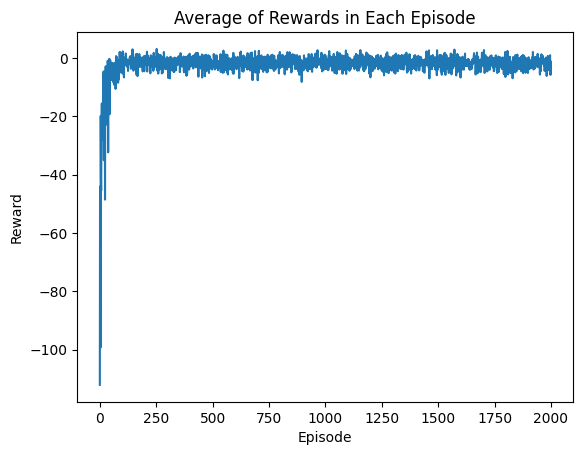

In [11]:
env = gym.make('Taxi-v3', render_mode="")
q_learning = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)
env.reset()

all_rewards = [[] for _ in range(REPS)]
for rep in range(REPS):
  for episode in range(EPISODES):
    all_rewards[rep].append(q_learning.run_episode(episode, decreasing=False))

avg_rewards = []
for i in range(EPISODES):
  avg_rewards.append(sum(all_rewards[rep][i] for rep in range(REPS))/REPS)

plt.plot(avg_rewards)
plt.title("Average of Rewards in Each Episode")
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.show()

#### Decreasing Learning Rate:

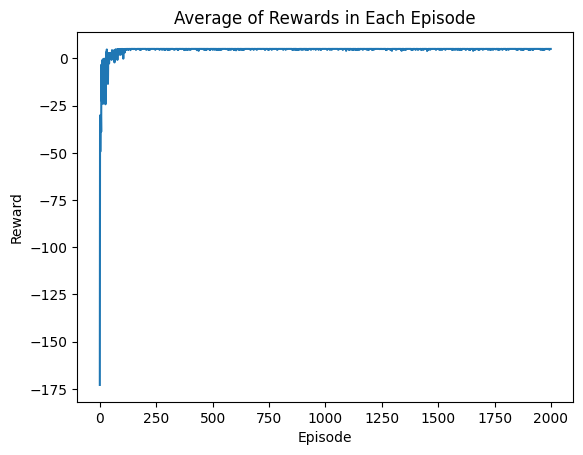

In [15]:
env = gym.make('Taxi-v3', render_mode="")
env = gym.make('Taxi-v3', render_mode="")
q_learning = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)
env.reset()

all_rewards = [[] for _ in range(REPS)]
for rep in range(REPS):
  for episode in range(EPISODES):
    all_rewards[rep].append(q_learning.run_episode(episode, decreasing=True))

avg_rewards = []
for i in range(EPISODES):
  avg_rewards.append(sum(all_rewards[rep][i] for rep in range(REPS))/REPS)

plt.plot(avg_rewards)
plt.title("Average of Rewards in Each Episode")
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.show()

As plotted above, decreasing learning rate and epsilon causes the algorithm to converge faster, resulting in a less disturbed diagram. In this implementation, epsilon is decreased by subtracting a small fraction of it by each episode, if epsilon is less than 0.001, the algorithm doesn't decrease it since it would almost stop the q-learning process.

<a name='2-4'></a>
### Question 10:

In [13]:
def show_taxi(agent:QLearningAgent):
    showenv = gym.make('Taxi-v3', render_mode="human")
    state , _ = showenv.reset(seed=STUDENT_NUM)
    q_values = agent.get_q_values()
    done = False
    showenv.render()
    time.sleep(0.5)
    while not done:
      action = np.argmax(q_values[state])
      state, reward, done, _, _ = showenv.step(action)
      showenv.render()
      time.sleep(0.5)
    showenv.close()

In [14]:
env = gym.make('Taxi-v3', render_mode="")
q_learning = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)
env.reset()

for episode in range(EPISODES):
    q_learning.run_episode(episode, decreasing=True)

show_taxi(q_learning)